# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
#define base and query URL
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q={cities[0]}&units={units}"

#get response
response = requests.get(query_url).json()

#print response and analyze format
response


{'coord': {'lon': -79.24, 'lat': 42.1},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 38.12,
  'feels_like': 33.42,
  'temp_min': 36,
  'temp_max': 39,
  'pressure': 1016,
  'humidity': 95},
 'visibility': 16093,
 'wind': {'speed': 3.36, 'deg': 140},
 'clouds': {'all': 90},
 'dt': 1583982762,
 'sys': {'type': 1,
  'id': 3418,
  'country': 'US',
  'sunrise': 1583926494,
  'sunset': 1583968736},
 'timezone': -14400,
 'id': 5122534,
 'name': 'Jamestown',
 'cod': 200}

In [22]:
#create summary dict
data = {"City": [],
       "Cloudiness": [],
       "Country": [],
       "Date": [],
       "Humidity": [],
       "Lat": [],
       "Lng": [],
       "Max Temp": [],
       "Wind Speed": []}

#set counts for print statment in loop
number = 0
sets = 1

#loop through cities in list
for item in cities:
    try:
        #redefine query_url and response for each city in the loop
        query_url = f"{url}appid={weather_api_key}&q={item}&units={units}"
        response = requests.get(query_url).json()
        #update print statement count and print
        number = number + 1
        print(f"Processing Record {number} of Set {sets} | {item}")
        #append summary dict with appropriate data
        data["City"].append(response['name'])
        data["Cloudiness"].append(response['clouds']['all'])
        data["Country"].append(response['sys']['country'])
        data["Date"].append(response['dt'])
        data["Humidity"].append(response['main']['humidity'])
        data["Lat"].append(response['coord']['lat'])
        data["Lng"].append(response['coord']['lon'])
        data["Max Temp"].append(response['main']['temp_max'])
        data["Wind Speed"].append(response['wind']['speed'])
    #create exception
    except:
        print("City not found. Skipping ...")
    #reset set counts after 50 records
    if number == 50:
        sets = sets+1
        number = 0
    #limit API requests
    time.sleep(1)

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | meulaboh
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | manokwari
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | mildura
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | luzhou
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping ...
Processing Record 16 of Set 1 | bulungu
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping ...
Processing Record 18 of Set 1 | saint-maximin-la-sainte-baume
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | bonavista
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | umzimvubu
City not fou

Processing Record 37 of Set 4 | erzin
Processing Record 38 of Set 4 | pacific grove
Processing Record 39 of Set 4 | hilo
Processing Record 40 of Set 4 | mentok
City not found. Skipping ...
Processing Record 41 of Set 4 | grand gaube
Processing Record 42 of Set 4 | gaffney
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | flin flon
Processing Record 45 of Set 4 | tezu
Processing Record 46 of Set 4 | ayan
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | altar
Processing Record 49 of Set 4 | beloha
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | skagastrond
City not found. Skipping ...
Processing Record 2 of Set 5 | southbridge
Processing Record 3 of Set 5 | ust-uda
Processing Record 4 of Set 5 | mossendjo
Processing Record 5 of Set 5 | coahuayana
Processing Record 6 of Set 5 | grindavik
Processing Record 7 of Set 5 | bazaliya
Processing Record 8 of Set 5 | waipawa
Processing Record 9 of Set 5 | seoul
Processing Record 

Processing Record 25 of Set 8 | malibu
Processing Record 26 of Set 8 | mitu
Processing Record 27 of Set 8 | laharpur
Processing Record 28 of Set 8 | umea
Processing Record 29 of Set 8 | newport
Processing Record 30 of Set 8 | ambilobe
Processing Record 31 of Set 8 | acapulco
Processing Record 32 of Set 8 | moramanga
Processing Record 33 of Set 8 | port hardy
Processing Record 34 of Set 8 | hoquiam
Processing Record 35 of Set 8 | lakeside
Processing Record 36 of Set 8 | wenling
Processing Record 37 of Set 8 | kabo
Processing Record 38 of Set 8 | samusu
City not found. Skipping ...
Processing Record 39 of Set 8 | kochevo
Processing Record 40 of Set 8 | buin
Processing Record 41 of Set 8 | ambon
Processing Record 42 of Set 8 | solnechnyy
Processing Record 43 of Set 8 | tadine
Processing Record 44 of Set 8 | chake chake
Processing Record 45 of Set 8 | iralaya
Processing Record 46 of Set 8 | gushikawa
Processing Record 47 of Set 8 | osorno
Processing Record 48 of Set 8 | tilichiki
Processin

Processing Record 15 of Set 12 | kitui
Processing Record 16 of Set 12 | kurume
Processing Record 17 of Set 12 | ferrol
Processing Record 18 of Set 12 | seymchan
Processing Record 19 of Set 12 | qunduz
Processing Record 20 of Set 12 | sterling
Processing Record 21 of Set 12 | umm kaddadah
Processing Record 22 of Set 12 | cognac
Processing Record 23 of Set 12 | lengshuitan
Processing Record 24 of Set 12 | merauke
Processing Record 25 of Set 12 | malakal
Processing Record 26 of Set 12 | colares
Processing Record 27 of Set 12 | jalu
Processing Record 28 of Set 12 | grand-santi
Processing Record 29 of Set 12 | kenora
Processing Record 30 of Set 12 | sungaipenuh
Processing Record 31 of Set 12 | orlik
Processing Record 32 of Set 12 | kikuchi
Processing Record 33 of Set 12 | pemba
Processing Record 34 of Set 12 | maloy
Processing Record 35 of Set 12 | kuruman
Processing Record 36 of Set 12 | imelda
Processing Record 37 of Set 12 | trairi


{'City': ['Jamestown',
  'Bathsheba',
  'Meulaboh',
  'Avarua',
  'Hasaki',
  'Ushuaia',
  'São Filipe',
  'Manokwari',
  'Albany',
  'Busselton',
  'Mildura',
  'Tuktoyaktuk',
  'Luzhou',
  'Vaini',
  'Bulungu',
  'Saint-Maximin-la-Sainte-Baume',
  'Port Lincoln',
  'Bonavista',
  'Ribeira Grande',
  'Mahébourg',
  'Kvitok',
  'Buíque',
  'Mataura',
  'Qaanaaq',
  'Molochnoye',
  'Guaymas',
  'Chokurdakh',
  'Arraial do Cabo',
  'Polunochnoye',
  'Saskylakh',
  'Nouadhibou',
  'Avera',
  'Rikitea',
  'Upernavik',
  'Narsaq',
  'Tommot',
  'Hithadhoo',
  'Kapaa',
  'Khani',
  'Kita',
  'Pisco',
  'Armilla',
  'Ponta do Sol',
  'Pombia',
  'Yangi Marg`ilon',
  'Coquimbo',
  'Ibrā’',
  'Norman Wells',
  'Nikolskoye',
  'Punta Arenas',
  'Fortuna',
  'Hong Kong',
  'Bambous Virieux',
  'Thompson',
  'Katsuura',
  'Margate',
  'Kruisfontein',
  'Riberalta',
  'Le Port',
  'Juneau',
  'Kalispell',
  'Tiksi',
  'Parrita',
  'Atuona',
  'Tuatapere',
  'Mar del Plata',
  'Hermanus',
  'Asău',


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#convert summary dict to dataframe and display
city_data_df = pd.DataFrame(data)
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,90,US,1583980319,86,42.10,-79.24,277.15,2.10
1,Bathsheba,20,BB,1583980325,61,13.22,-59.52,299.15,7.20
2,Meulaboh,28,ID,1583980358,83,4.14,96.13,300.56,2.94
3,Avarua,1,CK,1583980329,94,-21.21,-159.78,299.15,4.60
4,Hasaki,20,JP,1583980326,34,35.73,140.83,288.15,3.10
...,...,...,...,...,...,...,...,...,...
537,Pemba,11,MZ,1583981003,89,-12.97,40.52,298.86,3.82
538,Måløy,100,NO,1583981004,76,61.94,5.11,278.15,10.80
539,Kuruman,39,ZA,1583981005,65,-27.45,23.43,291.10,5.60
540,Imelda,70,PH,1583981006,77,7.65,123.95,300.35,4.32


In [13]:
#export dataframe to CSV file
city_data_df.to_csv("Output/city_data.csv",
                  encoding="utf-8", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

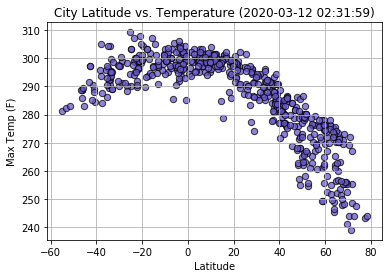

In [33]:
#defines variable to plot
max_temp = city_data_df["Max Temp"]
latitude = city_data_df["Lat"]
#set date
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'],unit='s')
date = city_data_df["Date"][0]
#create plot
plt.scatter(latitude, max_temp, s=40, c="slateblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=None, which='major', axis='both')

#### Latitude vs. Humidity Plot

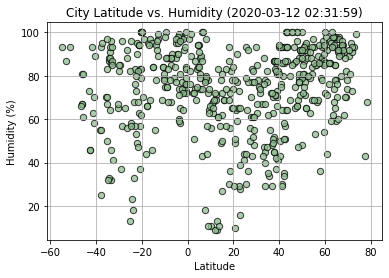

In [24]:
#defines variable to plot
humidity = city_data_df["Humidity"]
#create plot
plt.scatter(latitude, humidity, s=40, c="darkseagreen", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None, which='major', axis='both')

#### Latitude vs. Cloudiness Plot

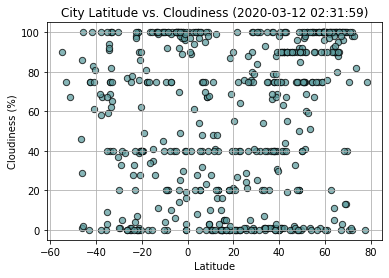

In [25]:
#defines variable to plot
cloudiness = city_data_df["Cloudiness"]
#create plot
plt.scatter(latitude, cloudiness, s=40, c="cadetblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None, which='major', axis='both')

#### Latitude vs. Wind Speed Plot

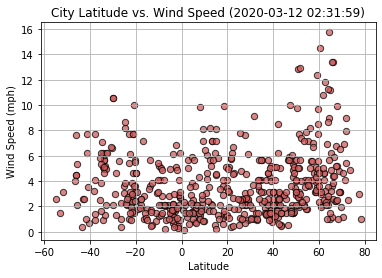

In [26]:
#defines variable to plot
wind_speed = city_data_df["Wind Speed"]
#create plot
plt.scatter(latitude, wind_speed, s=40, c="indianred", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None, which='major', axis='both')

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [30]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,90,US,2020-03-12 02:31:59,86,42.10,-79.24,277.15,2.10
1,Bathsheba,20,BB,2020-03-12 02:32:05,61,13.22,-59.52,299.15,7.20
2,Meulaboh,28,ID,2020-03-12 02:32:38,83,4.14,96.13,300.56,2.94
4,Hasaki,20,JP,2020-03-12 02:32:06,34,35.73,140.83,288.15,3.10
6,São Filipe,0,CV,2020-03-12 02:32:35,62,14.90,-24.50,296.64,4.44
...,...,...,...,...,...,...,...,...,...
533,Kenora,40,CA,2020-03-12 02:43:19,92,49.82,-94.43,272.15,3.10
535,Orlik,59,RU,2020-03-12 02:43:21,80,52.52,99.83,255.92,2.31
536,Kikuchi,54,JP,2020-03-12 02:43:22,43,32.98,130.82,289.82,1.00
538,Måløy,100,NO,2020-03-12 02:43:24,76,61.94,5.11,278.15,10.80


In [29]:
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,Avarua,1,CK,2020-03-12 02:32:09,94,-21.21,-159.78,299.15,4.60
5,Ushuaia,90,AR,2020-03-12 02:27:44,93,-54.80,-68.30,281.15,2.60
7,Manokwari,19,ID,2020-03-12 02:28:33,84,-0.87,134.08,299.05,2.68
9,Busselton,82,AU,2020-03-12 02:31:44,32,-33.65,115.33,299.82,5.16
10,Mildura,91,AU,2020-03-12 02:32:58,33,-34.20,142.15,304.26,5.10
...,...,...,...,...,...,...,...,...,...
528,Merauke,100,ID,2020-03-12 02:43:13,68,-8.47,140.33,303.69,4.91
534,Sungai Penuh,30,ID,2020-03-12 02:43:20,64,-2.08,101.38,297.87,1.90
537,Pemba,11,MZ,2020-03-12 02:43:23,89,-12.97,40.52,298.86,3.82
539,Kuruman,39,ZA,2020-03-12 02:43:25,65,-27.45,23.43,291.10,5.60


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

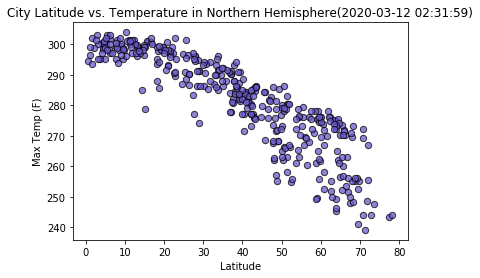

In [41]:
#defines variable to plot
n_max_temp = northern_df["Max Temp"]
n_latitude = northern_df["Lat"]

#create plot
plt.scatter(n_latitude, n_max_temp, s=40, c="slateblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Temperature in Northern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

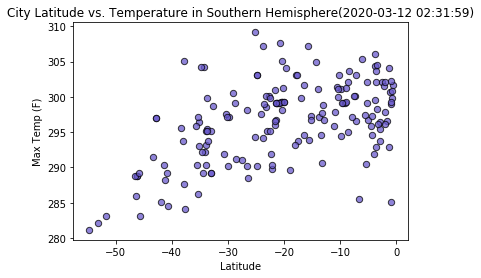

In [42]:
#defines variable to plot
s_max_temp = southern_df["Max Temp"]
s_latitude = southern_df["Lat"]

#create plot
plt.scatter(s_latitude, s_max_temp, s=40, c="slateblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Temperature in Southern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

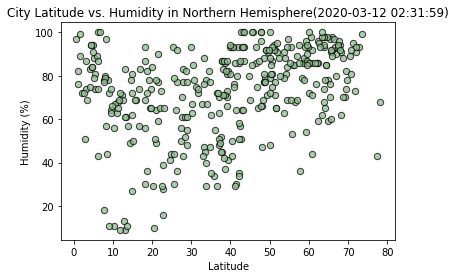

In [43]:
#defines variable to plot
n_humidity = northern_df["Humidity"]
#create plot
plt.scatter(n_latitude, n_humidity, s=40, c="darkseagreen", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Humidity in Northern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

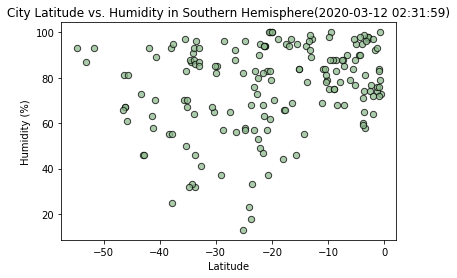

In [44]:
#defines variable to plot
s_humidity = southern_df["Humidity"]
#create plot
plt.scatter(s_latitude, s_humidity, s=40, c="darkseagreen", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Humidity in Southern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

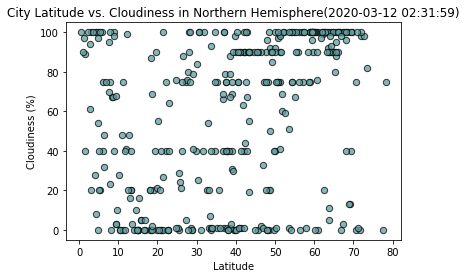

In [45]:
#defines variable to plot
n_cloudiness = northern_df["Cloudiness"]
#create plot
plt.scatter(n_latitude, n_cloudiness, s=40, c="cadetblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Cloudiness in Northern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

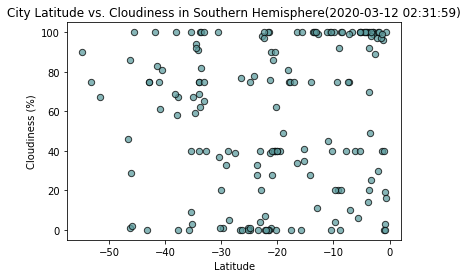

In [46]:
#defines variable to plot
s_cloudiness = southern_df["Cloudiness"]
#create plot
plt.scatter(s_latitude, s_cloudiness, s=40, c="cadetblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Cloudiness in Southern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

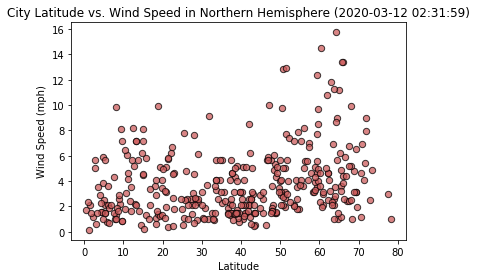

In [47]:
#defines variable to plot
n_wind_speed = northern_df["Wind Speed"]
#create plot
plt.scatter(n_latitude, n_wind_speed, s=40, c="indianred", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Wind Speed in Northern Hemisphere ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

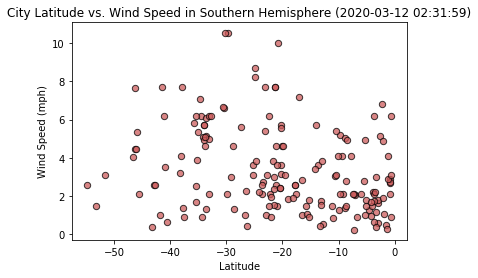

In [48]:
#defines variable to plot
s_wind_speed = southern_df["Wind Speed"]
#create plot
plt.scatter(s_latitude, s_wind_speed, s=40, c="indianred", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Wind Speed in Southern Hemisphere ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()